# Project Student Marks

Problem Statment

1. Create a table named studmarks in Mysql . Choose the column name and its datatypes accordingly to the students_marks .csv 
in github Link https://github.com/dsrscientist/dataset1/blob/master/student_marks.csv



2.Load the data of students marks.csv into mysql database by load local infile command . 


3.Now open jupyter notebook ,make a connection with mysql ,fetch the data of students marks in notebook. 
(This process is known as data mining).


4.Now the data is loaded in jupyter notebook ,now start making evaluation of data using all steps of EDA(exploratory data analysis).

# Table creation and  import the csv  to  Mysql 

# Table creation and  import the csv  to PostgreSQL(Optional) 

# Fetech data using MySQL

In [2]:
# Install mysql connection libraries
!pip install mysql-connector-python
 

In [5]:
import mysql.connector
import pandas as pd

In [6]:
con=mysql.connector.connect(
host="localhost",
    port=3306,
    user="root",
    password="emr123",
    database="MyMLPractice"
)
df=pd.read_sql_query("select * from studentmarks",con)
df.head(10)

,StudentName,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


# Fetech data using PostgreSQL server (Optional)

In [8]:
!pip install psycopg2

In [6]:
import psycopg2
import pandas as pd
connect_string = 'dbname=MyPractice host=localhost port=5433 user=postgres password=emr123'
connection = psycopg2.connect(connect_string)
df=pd.read_sql_query("select * from student_marks",connection)
df.head()


,StudentName,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53


# exploratory data analysis

In [62]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import skew
# configure matplotlib to output inline
%matplotlib inline


In [7]:
df

,StudentName,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [29]:
# let as add percentage column = sum of marks/total marks   we are asssuming 100 marks each exam 
df['percentage']= (df.iloc[:,3:].sum(axis=1)/800)*100


In [30]:
df

,StudentName,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,percentage
0,John,M,05-04-1988,55,45,56,87,21,52,89,65,58.750
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2,65.500
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74,69.500
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45,73.250
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53,73.375
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52,69.500
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61,62.000
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87,64.625
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89,73.375
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77,70.750


In [31]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,percentage
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000,68.062500
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432,5.126947
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000,58.750000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500,64.843750
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000,69.500000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500,72.625000
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000,73.375000


In [32]:
df.keys()

Index(['StudentName', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry',
       'English', 'Biology', 'Economics', 'History', 'Civics', 'percentage'],
      dtype='object')

In [33]:
#checking Null values
df.isnull().sum()

StudentName    0
Gender         0
DOB            0
Maths          0
Physics        0
Chemistry      0
English        0
Biology        0
Economics      0
History        0
Civics         0
percentage     0
dtype: int64

In [35]:
# Label Encoding for categorical data Gender column 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, 1] = labelencoder.fit_transform(df['Gender'])
df['Gender']

# Male -1,Female 0

0    1
1    1
2    1
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: Gender, dtype: int32

In [37]:
df['Gender'].value_counts()

1    5
0    5
Name: Gender, dtype: int64

Text(0.5, 1, 'Gender')

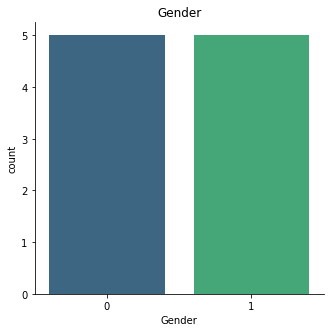

In [39]:
# bivirate anaysis for categorical data
sns.catplot(x='Gender',kind='count',data=df,height=4.5,palette='viridis')
plt.title('Gender')

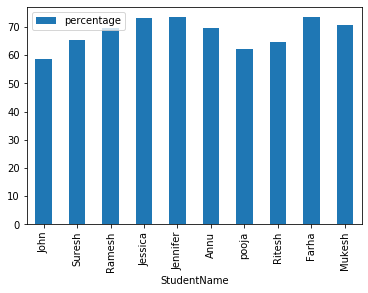

In [43]:
df.plot.bar(x="StudentName",y="percentage")

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


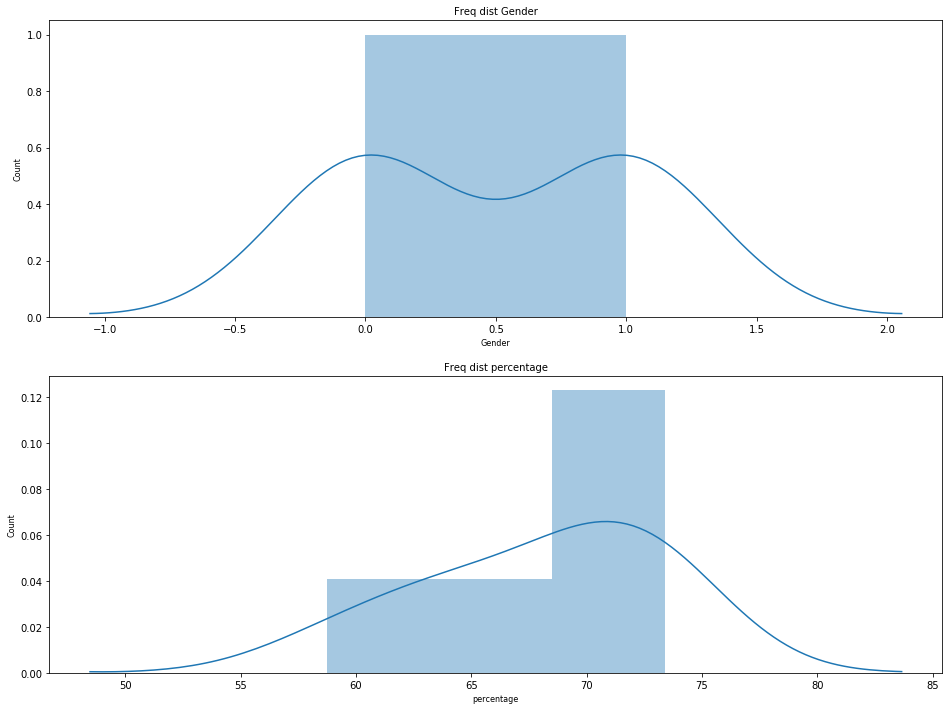

In [46]:
col_names = ['Gender', 'percentage']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

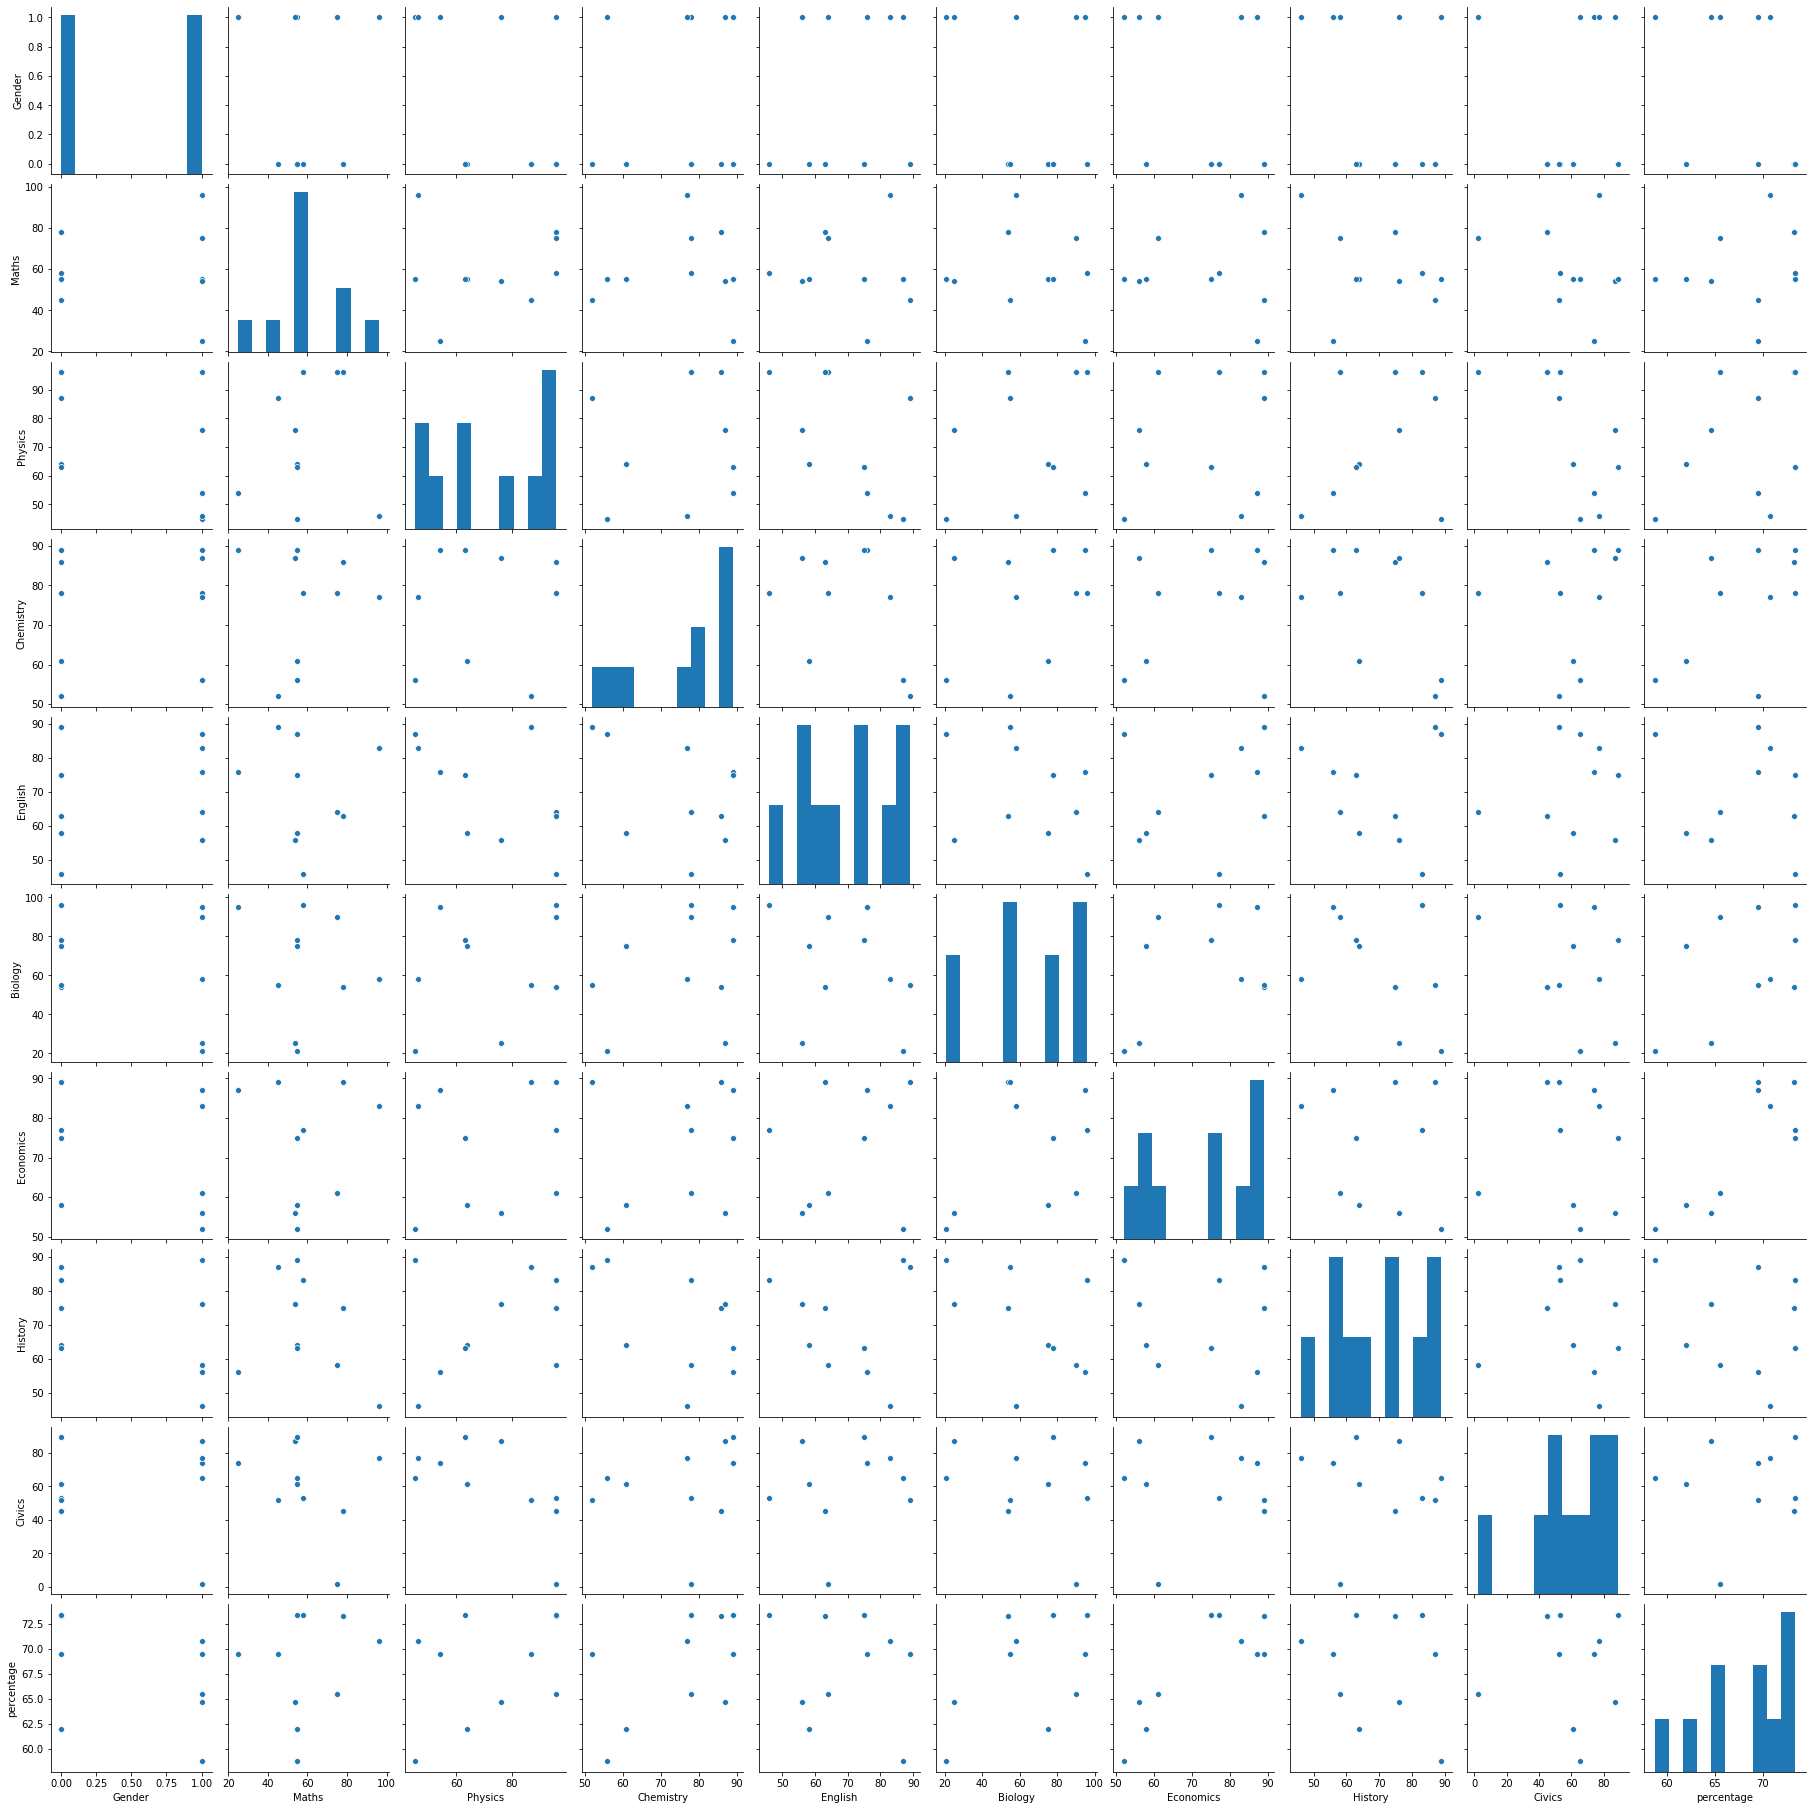

In [47]:
# univarite analysis using pairplot 
sns.pairplot(df)

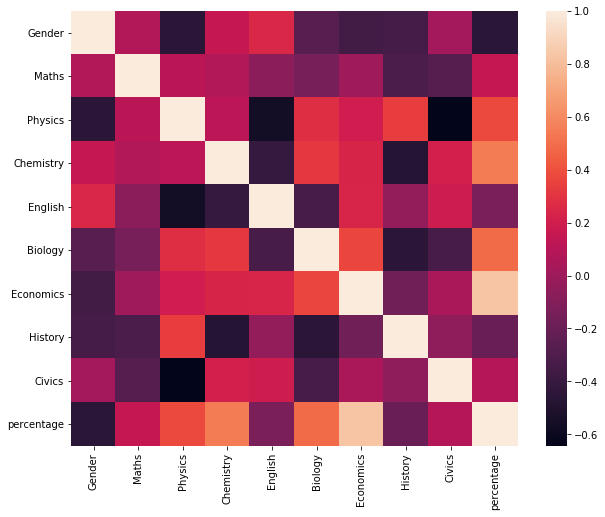

In [49]:
# Correlation between data

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [51]:
# removing dob column
df.drop('DOB', axis=1, inplace=True)

In [52]:
df

,StudentName,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,percentage
0,John,1,55,45,56,87,21,52,89,65,58.750
1,Suresh,1,75,96,78,64,90,61,58,2,65.500
2,Ramesh,1,25,54,89,76,95,87,56,74,69.500
3,Jessica,0,78,96,86,63,54,89,75,45,73.250
4,Jennifer,0,58,96,78,46,96,77,83,53,73.375
5,Annu,0,45,87,52,89,55,89,87,52,69.500
6,pooja,0,55,64,61,58,75,58,64,61,62.000
7,Ritesh,1,54,76,87,56,25,56,76,87,64.625
8,Farha,0,55,63,89,75,78,75,63,89,73.375
9,Mukesh,1,96,46,77,83,58,83,46,77,70.750


In [59]:
#due to percentage and less data not performing  outlier 
# preparing dependent (target) and independent variables i,e; x,y 
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
y=np.array(y).reshape(-1,1)

In [60]:
print(x.shape)
print(y.shape)

(10, 9)
(10, 1)


In [61]:
# splitting data as X_train and X_test
# default random_state=42 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [63]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

1.82243900696089

In [71]:
df = pd.DataFrame({'Actual': np.array(y_test)[:,0], 'Predicted': y_pred[:,0]})
df

,Actual,Predicted
0,73.375,72.552774
1,65.500,63.057356


In [74]:
# Saving the Model
from sklearn.externals import joblib
joblib.dump(regressor,'studentmarks')
OuModel=joblib.load('studentmarks')
OuModel.predict(X_test)

array([[72.55277359],
       [63.05735561]])